# 데이콘: 이커머스 고객 세분화 분석 아이디어 경진대회
---

- 해당 대회에 대한 간단한 소개와 인사글은 README.md 파일에 작성되어 있습니다.

- 혹시 보고싶으신 분은 [이 텍스트를 클릭해주세요. 깃허브 링크로 연결됩니다](https://github.com/Randy-archive/ecommerce_seg)

---

안녕하세요, 대회에 참여하게 된 랜디 Randy입니다.

제안서 제목을 원래 `데이터 씹고 뜯고 맛보고 즐기기` 로 설정했다가,

`씹고`, `맛보고`의 워딩이 좀 격해(?)보여서 빼고 작성했습니다.

기본적으로 주어진 모든 데이터를 활용해 연관성을 찾기 위해 노력했습니다.

만약 실제 프로젝트였다면

연관성이 없다 하여 분석한 내용을 뺄 경우 다른 팀원이 똑같은 분석을 중복해서 작업할 가능성이 있습니다.

따라서 연관성을 찾지 못한 항목도 효율성 측면에서 나름의 의미가 있기 때문에,

빼지 않고 목차에 넣어두었습니다.

목차는 아래와 같습니다.

# [Index]
---

1. 데이터 살펴보기

2. 온라인 마케팅 비용의 효율성

3. 간단한 고객 분석

    1. 가입 기간과 매출액의 관계

    2. 각 카테고리의 충성 고객

        1. 지역별

        2. 성별

4. 세금, 그리고 매출

5. 할인율과 매출의 주기성

6. 할인율에 따른 리텐션 Cohort 분석

7. 월별 BEST, WORST 상품카테고리 알아보기

8. RFM 분석

9. 결론 요약


In [12]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [13]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

# [1. 데이터 살펴보기]

어떤 데이터가 어떤 형식으로 존재하는지 한번 살펴보도록 하겠습니다.

In [14]:
customer_data = pd.read_csv('Customer_info.csv')
discount_data = pd.read_csv('Discount_info.csv')
marketing_data = pd.read_csv('Marketing_info.csv')
onlinesales_data = pd.read_csv('Onlinesales_info.csv')
tax_data = pd.read_csv('Tax_info.csv')

customer = customer_data.copy()
discount = discount_data.copy()
marketing = marketing_data.copy()
onlinesales = onlinesales_data.copy()
tax = tax_data.copy()

print(customer.shape)
customer.head()
# 고객 ID, 성별, 고객지역, 가입기간(단위: 월)

(1468, 4)


,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [15]:
print(discount.shape)
discount.head()
# 월(month), 제품카테고리, 쿠폰코드, 할인율(%)

(204, 4)


,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [16]:
print(marketing.shape)
marketing['날짜'] = pd.to_datetime(marketing['날짜'])
marketing.head()
# 날짜, 오프라인 마케팅으로 지출한 비용(달러), 온라인 마케팅으로 지출한 비용(달러)

(365, 3)


,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [17]:
print(onlinesales.shape)
onlinesales['거래날짜'] = pd.to_datetime(onlinesales['거래날짜'])
onlinesales.head()
# 고객 고유 ID, 거래 고유 ID, 거래 날짜, 제품 고유 ID, 제품 카테고리, 주문수량,
# 평균금액 (동일 상품이어도 세부 옵션에 따라 가격 상이, 단위 달러)
# 배송료(단위 달러), 쿠폰 적용 상태

(52924, 9)


,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [18]:
print(tax.shape)
tax
# 제품 카테고리, Goods and Services Tax(%)

(20, 2)


,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


# [2. 온라인 마케팅 비용의 효율성]
---

`Marketing_info.csv`를 보면 날짜, 오프라인비용, 온라인 비용이 존재합니다.

온라인 비용은 날마다 바뀌지만, 오프라인 비용은 일정 기간동안 동일하다는 것을 발견했습니다.

따라서 오프라인 비용이 동일할 때, 온라인 비용이 증가하고 감소함에 따라 매출액에는 어떤 변화가 있는지 살펴보도록 하겠습니다.

In [19]:
classified_bills = []
standard = 0
tmp = pd.DataFrame()
'''
오프라인 비용이 똑같은 기간을 하나의 DataFrame으로 구성해서,
classified_bills 리스트에 각각의 DataFrame으로 저장하려고 합니다.
예를 들어 오프라인 비용이 4000달러가 고정인 채로 일주일이 지속된다면
일주일 동안의 데이터는 모두 하나의 DataFrame에 저장되고,

다음 날부터 오프라인 비용이 4500달러가 된다면
새로운 DataFrame에 오프라인비용이 4500인 행들이 쌓이게 됩니다.

날짜가 연속적일때만 하나의 DataFrame으로 삽입되며,
오프라인비용이 같다 할지라도 날짜가 연속적이지 않을 경우
별도의 DataFrame으로 구성합니다.

또한 onlinesales DataFrame에서 수량과 평균금액을 곱하여 그 날의 총 매출액을 구해
DataFrame에 삽입해주도록 하겠습니다
'''

# 그 날의 판매수량, 평균금액, 이 둘을 곱한 총매출액을 구하는 함수
def calculate_sales(date):
    daily_sales = onlinesales[onlinesales['거래날짜'] == date]

    return daily_sales['수량'].sum(), \
        daily_sales['평균금액'].sum(), \
        daily_sales['수량'].sum() * daily_sales['평균금액'].sum()

# 당일의 온라인 비용과 전일의 온라인 비용을 전달받아
# 전일 대비 비용의 증감률을 반환하는 함수
def calculate_ratio(df):
    row['비용증감'] = 0
    row['매출증감'] = 0
    for idx in range(1, len(df)):
        prev_cost = df.iloc[idx - 1]['온라인비용']
        prev_sales = df.iloc[idx - 1]['총매출액']
        df.loc[idx, '비용증감'] = ((df.loc[idx, '온라인비용'] / prev_cost) - 1) * 100
        df.loc[idx, '매출증감'] = ((df.loc[idx, '총매출액'] / prev_sales) - 1) * 100
    return df

for idx, row in marketing.iterrows():
    # 오프라인비용이 같을 땐 하나의 DataFrame으로 설정
    if row['오프라인비용'] == marketing.loc[standard]['오프라인비용']:
        tmp = pd.concat([tmp, pd.DataFrame([row])], ignore_index=True)

    # 오프라인비용이 달라지면 기존의 DataFrame을 classified_bills에 추가
    else:
        for date in tmp['날짜']:
            count, sum_price, total_sales = calculate_sales(date)
            tmp.loc[tmp['날짜'] == date, ['수량', '평균금액', '총매출액']] = count, sum_price, total_sales
        tmp = calculate_ratio(tmp)
        classified_bills.append(tmp)

        # 초기화
        standard = idx
        tmp = pd.DataFrame([row])

# 마지막 그룹 처리
if not tmp.empty:
    for date in tmp['날짜']:
        count, sum_price, total_sales = calculate_sales(date)
        tmp.loc[tmp['날짜'] == date, ['수량', '평균금액', '총매출액']] = count, sum_price, total_sales
    tmp = calculate_ratio(tmp)
    classified_bills.append(tmp)

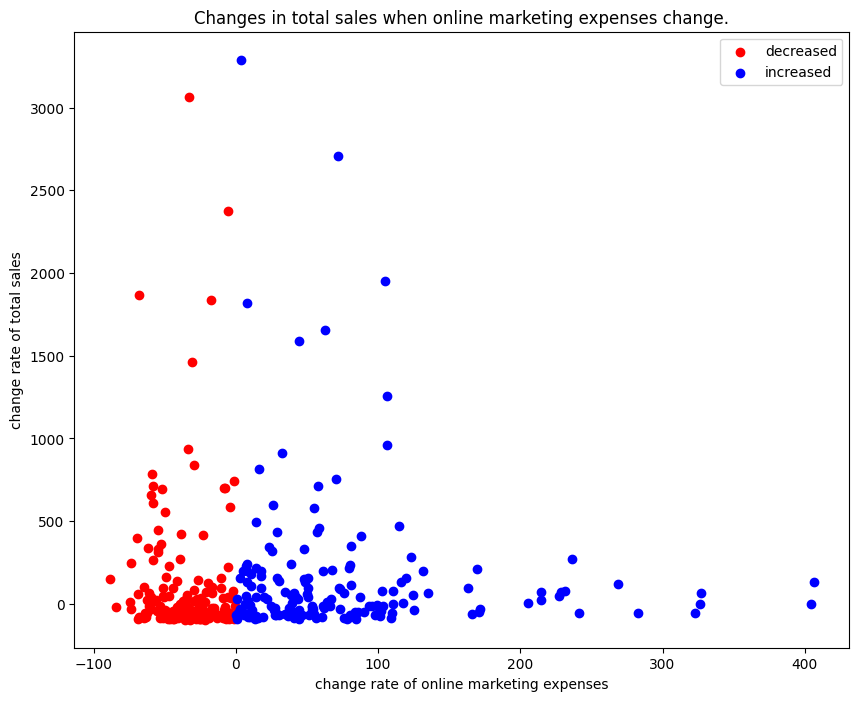

In [20]:
decreased_cost = pd.DataFrame()
increased_cost = pd.DataFrame()

'''
이제 classified_bills 안에 있는 각 데이터프레임을 순회하며
비용증감이 음수면 decreased_cost에,
비용증감이 양수면 increased_cost에 데이터를 삽입합니다.

이렇게 만들어진 두 개의 데이터프레임을 바탕으로 산점도를 그려
온라인 비용의 증감이 매출 증감에 어떤 영향을 미치는지 살펴보도록 하겠습니다.
'''

for df in classified_bills:
    decreased_cost = pd.concat([decreased_cost, df[df['비용증감'] < 0]])
    increased_cost = pd.concat([increased_cost, df[df['비용증감'] > 0]])

plt.figure(figsize=(10, 8))
# 비용증감이 음수인 경우 빨간색으로 표시
plt.scatter(decreased_cost['비용증감'], decreased_cost['매출증감'], color='red', label='decreased')
plt.scatter(increased_cost['비용증감'], increased_cost['매출증감'], color='blue', label='increased')

plt.title('Changes in total sales when online marketing expenses change.')
plt.xlabel('change rate of online marketing expenses')
plt.ylabel('change rate of total sales')
plt.legend()
plt.show()

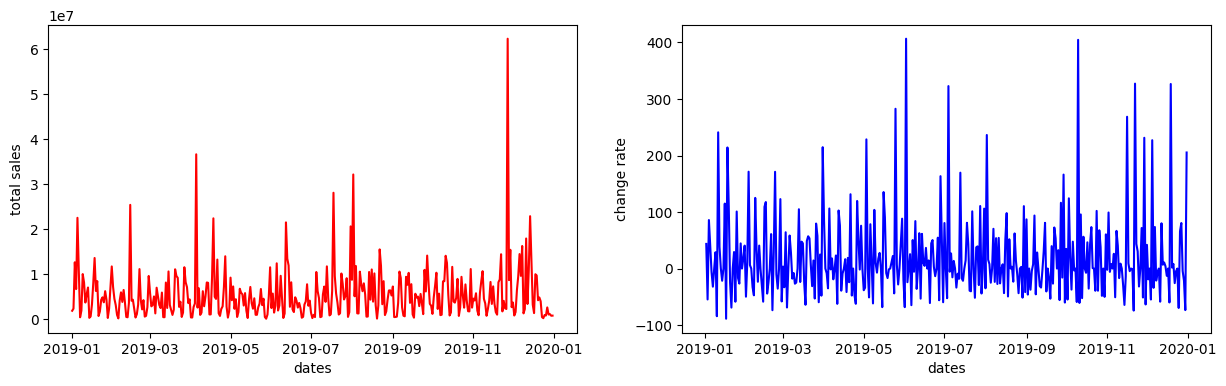

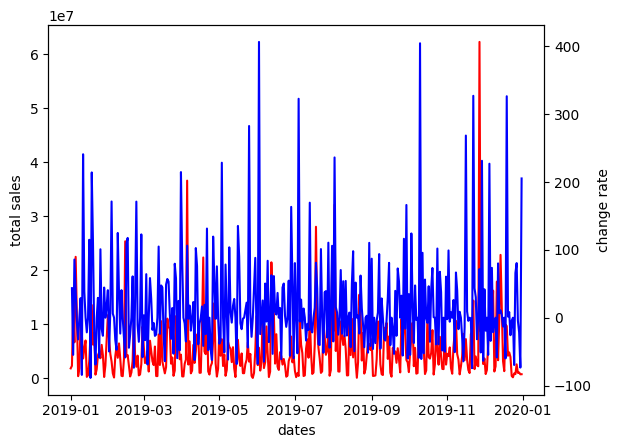

In [21]:
tmp_data = pd.DataFrame()

for df in classified_bills:
    tmp_data = pd.concat([tmp_data, df])

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(tmp_data['날짜'], tmp_data['총매출액'], color='red', label='change of total sales')
plt.xlabel('dates')
plt.ylabel('total sales')

plt.subplot(1, 2, 2)
plt.plot(tmp_data['날짜'], tmp_data['비용증감'], color='blue', label='change rate of costs')
plt.xlabel('dates')
plt.ylabel('change rate')

fig, ax1 = plt.subplots()
ax1.plot(tmp_data['날짜'], tmp_data['총매출액'], color='red', label='change of total sales')
ax1.set_xlabel('dates')
ax1.set_ylabel('total sales')

ax2 = ax1.twinx()
ax2.plot(tmp_data['날짜'], tmp_data['비용증감'], color='blue', label='change rate of costs')
ax2.set_ylabel('change rate')

plt.show()

## 분석
---

산점도로 보나, 그래프로 보나 마케팅비용과 매출액은 큰 연관성이 없어보입니다.

양의 상관관계도, 음의 상관관계도 없다는 결론을 내릴 수 있습니다.

온라인 비용이 들쭉날쭉하다는 것은

CPM이나 CPC와 같은 온라인 마케팅 비용을 효율화하기 위해

퍼포먼스 마케팅을 진행하고 있다는 것으로 유추할 수 있는데,

이러한 과정이 명시적인 성과를 내고있진 못한 것 같습니다.

추가적으로, 마케팅 비용과는 별개로 시간이 지남에 따라 매출액이 우상향하지 않는 모습을 보입니다.

즉, **해당 이커머스 플랫폼 자체의 성장이 이루어지지 않고있다는 분석**이 가능합니다.

## 발전
---

퍼포먼스 마케팅 뿐만아니라 할인쿠폰을 더 적극적으로 제공하는 등

다양한 방법을 통해 유입된 유저들의 리텐션을 유지하는 것이 중요합니다.

이에 더해 다양한 고객의 필요를 충족시킬 수 있도록 상품의 다양화를 진행하거나

기존 유저의 매출을 증대시킬 수 있도록 추천 알고리즘의 개선이 필요해보입니다.

# [3. 간단한 고객 분석]

## 3-1. 가입 기간과 매출액의 관계
---

가입 기간이 오래된 고객에게 프로모션을 진행하는 아이디어를 생각해볼 수 있습니다.

가입 기간이 오래될수록 매출액은 늘어날까요? 한번 알아보겠습니다.

### 분석 방법
---
단순히 각 유저의 총 매출액을 기준으로 한다면,

리텐션이 일정하다는 가정 하에 가입 기간이 길수록 매출액이 당연히 높을 수밖에 없습니다.

따라서 제공된 데이터가 1년치의 데이터이므로

4분기에 해당하는 10월, 11월, 12월에 제품을 구매한 유저의 총 매출액을 구한 다음

각 유저의 가입기간과 매출액의 크기를 살펴보도록 하겠습니다.

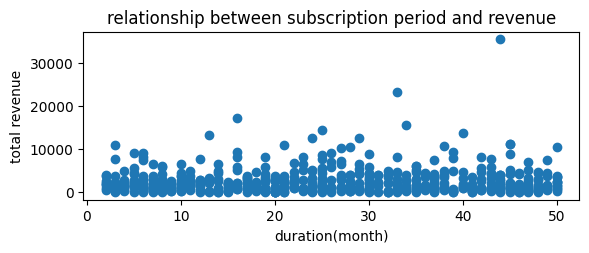

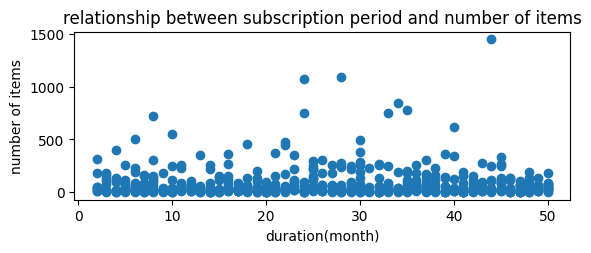

In [22]:
# 날짜가 10월 1일 이후인 데이터만 추출,
# 유저별로 총 매출액 합산하여 별도의 dataframe에 삽입
date = datetime(2019, 10, 1)
tmp = onlinesales[onlinesales['거래날짜'] >= date].copy()
tmp['총매출'] = tmp['수량'] * tmp['평균금액']

grouped = tmp.groupby('고객ID').agg({'수량':'sum', '총매출':'sum'}).reset_index()

# 고객ID를 기준으로 grouped데이터와 customer데이터를 병합
merged = pd.merge(customer[['고객ID', '가입기간']], grouped, on='고객ID')

plt.subplot(2, 1, 1)
plt.scatter(merged['가입기간'], merged['총매출'])
plt.xlabel('duration(month)')
plt.ylabel('total revenue')
plt.title('relationship between subscription period and revenue')
plt.show()

plt.subplot(2, 1, 2)
plt.scatter(merged['가입기간'], merged['수량'])
plt.xlabel('duration(month)')
plt.ylabel('number of items')
plt.title('relationship between subscription period and number of items')
plt.show()

## 결과
---
> **4분기(10월, 11월, 12월)에 물건을 구매한 유저 중 가입기간과 매출액에 상관관계가 있다는 가설은 기각되었습니다.**
>
> **가입 기간과 구매 개수에 상관관계가 있다는 가설도 기각되었습니다.**

따라서 가입기간이 오래되었다고 할인 쿠폰을 제공하는 행사나,

신규 가입이라고 할인 쿠폰을 제공하는 등의 행사를 진행하고자 할 때

현재로선 가입 기간에 따른 매출액 추이에 연관성이 없기때문에

해당 행사의 진행 여부를 조금 더 면밀히 검토해야 할 필요가 있습니다.

## 3-2. 각 카테고리의 충성 고객; 지역과 성별로 살펴보기
---
지역에 따라, 혹은 성별에 따라 자주 구매하는 물건의 카테고리가 나뉘어져 있을까요? 한번 살펴보겠습니다.

In [23]:
grouped = onlinesales.groupby(['고객ID', '제품카테고리']).agg({'수량':'sum', '평균금액':'sum'}).reset_index()

merged = pd.merge(customer[['고객ID', '성별', '고객지역']], grouped, on='고객ID')

filtered_by_gender = merged.groupby('제품카테고리').agg(
    남자=('성별', lambda x: np.sum(x == '남')),
    여자=('성별', lambda x: np.sum(x == '여')),
    남자총수량=('수량', lambda x: np.sum(x[merged['성별'] == '남'])),
    여자총수량=('수량', lambda x: np.sum(x[merged['성별'] == '여']))
    ).reset_index()
filtered_by_gender

,제품카테고리,남자,여자,남자총수량,여자총수량
0,Accessories,55,95,319,778
1,Android,16,26,18,27
2,Apparel,486,837,11636,20802
3,Backpacks,39,36,49,64
4,Bags,277,451,4376,10897
5,Bottles,74,129,1030,1060
6,Drinkware,341,578,11307,19194
7,Fun,49,69,432,402
8,Gift Cards,30,47,57,149
9,Google,35,54,148,427


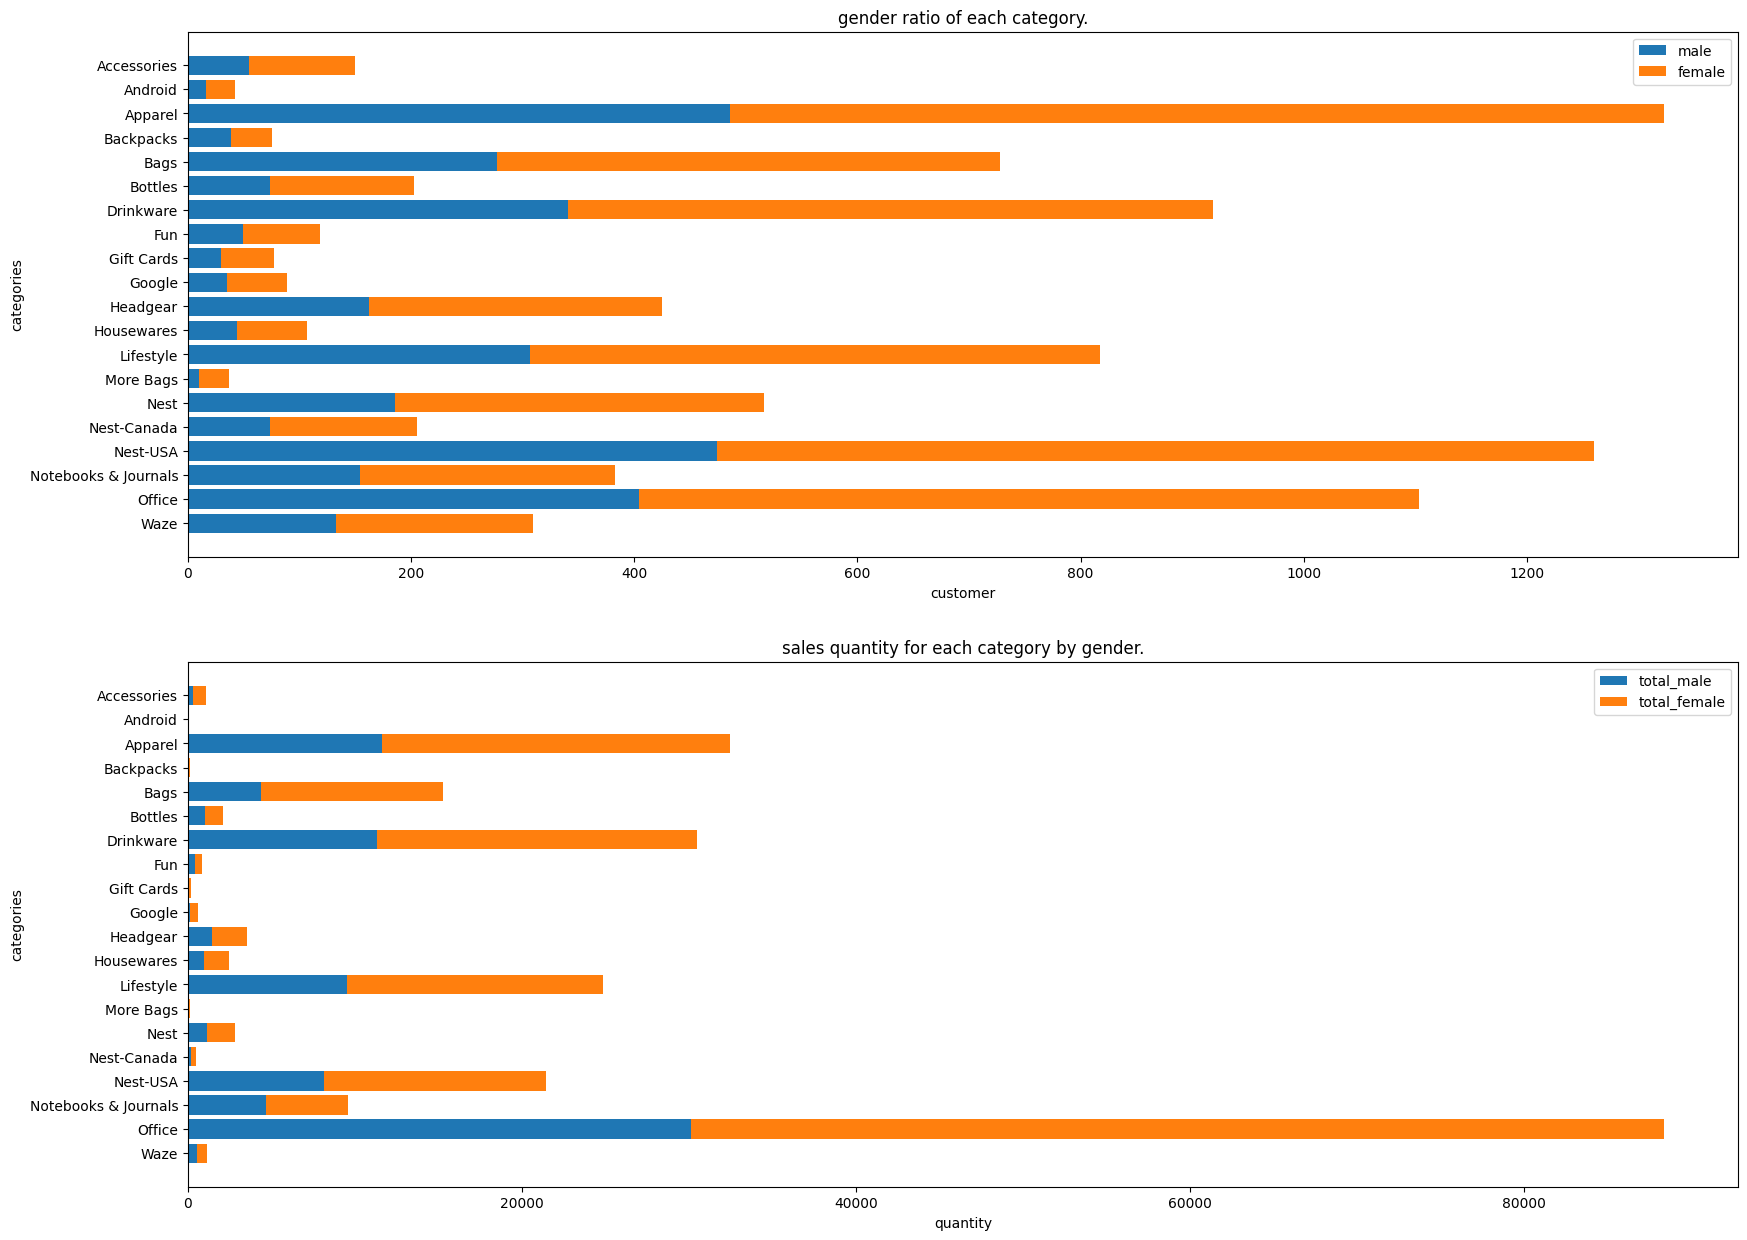

In [24]:
# 그래프를 그리기 위한 데이터 추출
categories = filtered_by_gender['제품카테고리']
male = filtered_by_gender['남자']
female = filtered_by_gender['여자']
total_male = filtered_by_gender['남자총수량']
total_female = filtered_by_gender['여자총수량']

plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.barh(categories, male, label='male')
plt.barh(categories, female, left=male, label='female')
plt.xlabel('customer')
plt.ylabel('categories')
plt.title('gender ratio of each category.')
plt.legend()
plt.gca().invert_yaxis()

plt.subplot(2, 1, 2)
plt.barh(categories, total_male, label='total_male')
plt.barh(categories, total_female, left=total_male, label='total_female')
plt.xlabel('quantity')
plt.ylabel('categories')
plt.title('sales quantity for each category by gender.')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

## 결과
---

모든 카테고리에서, 남성보다 여성이 구매한 횟수가 많았으며

총 구매수량 또한 여성이 더욱 많다는 것을 알 수 있습니다.

따라서 마케팅이나 행사를 진행할 계획이라면 여성을 겨냥하여 계획하는 것이 합리적으로 보입니다.

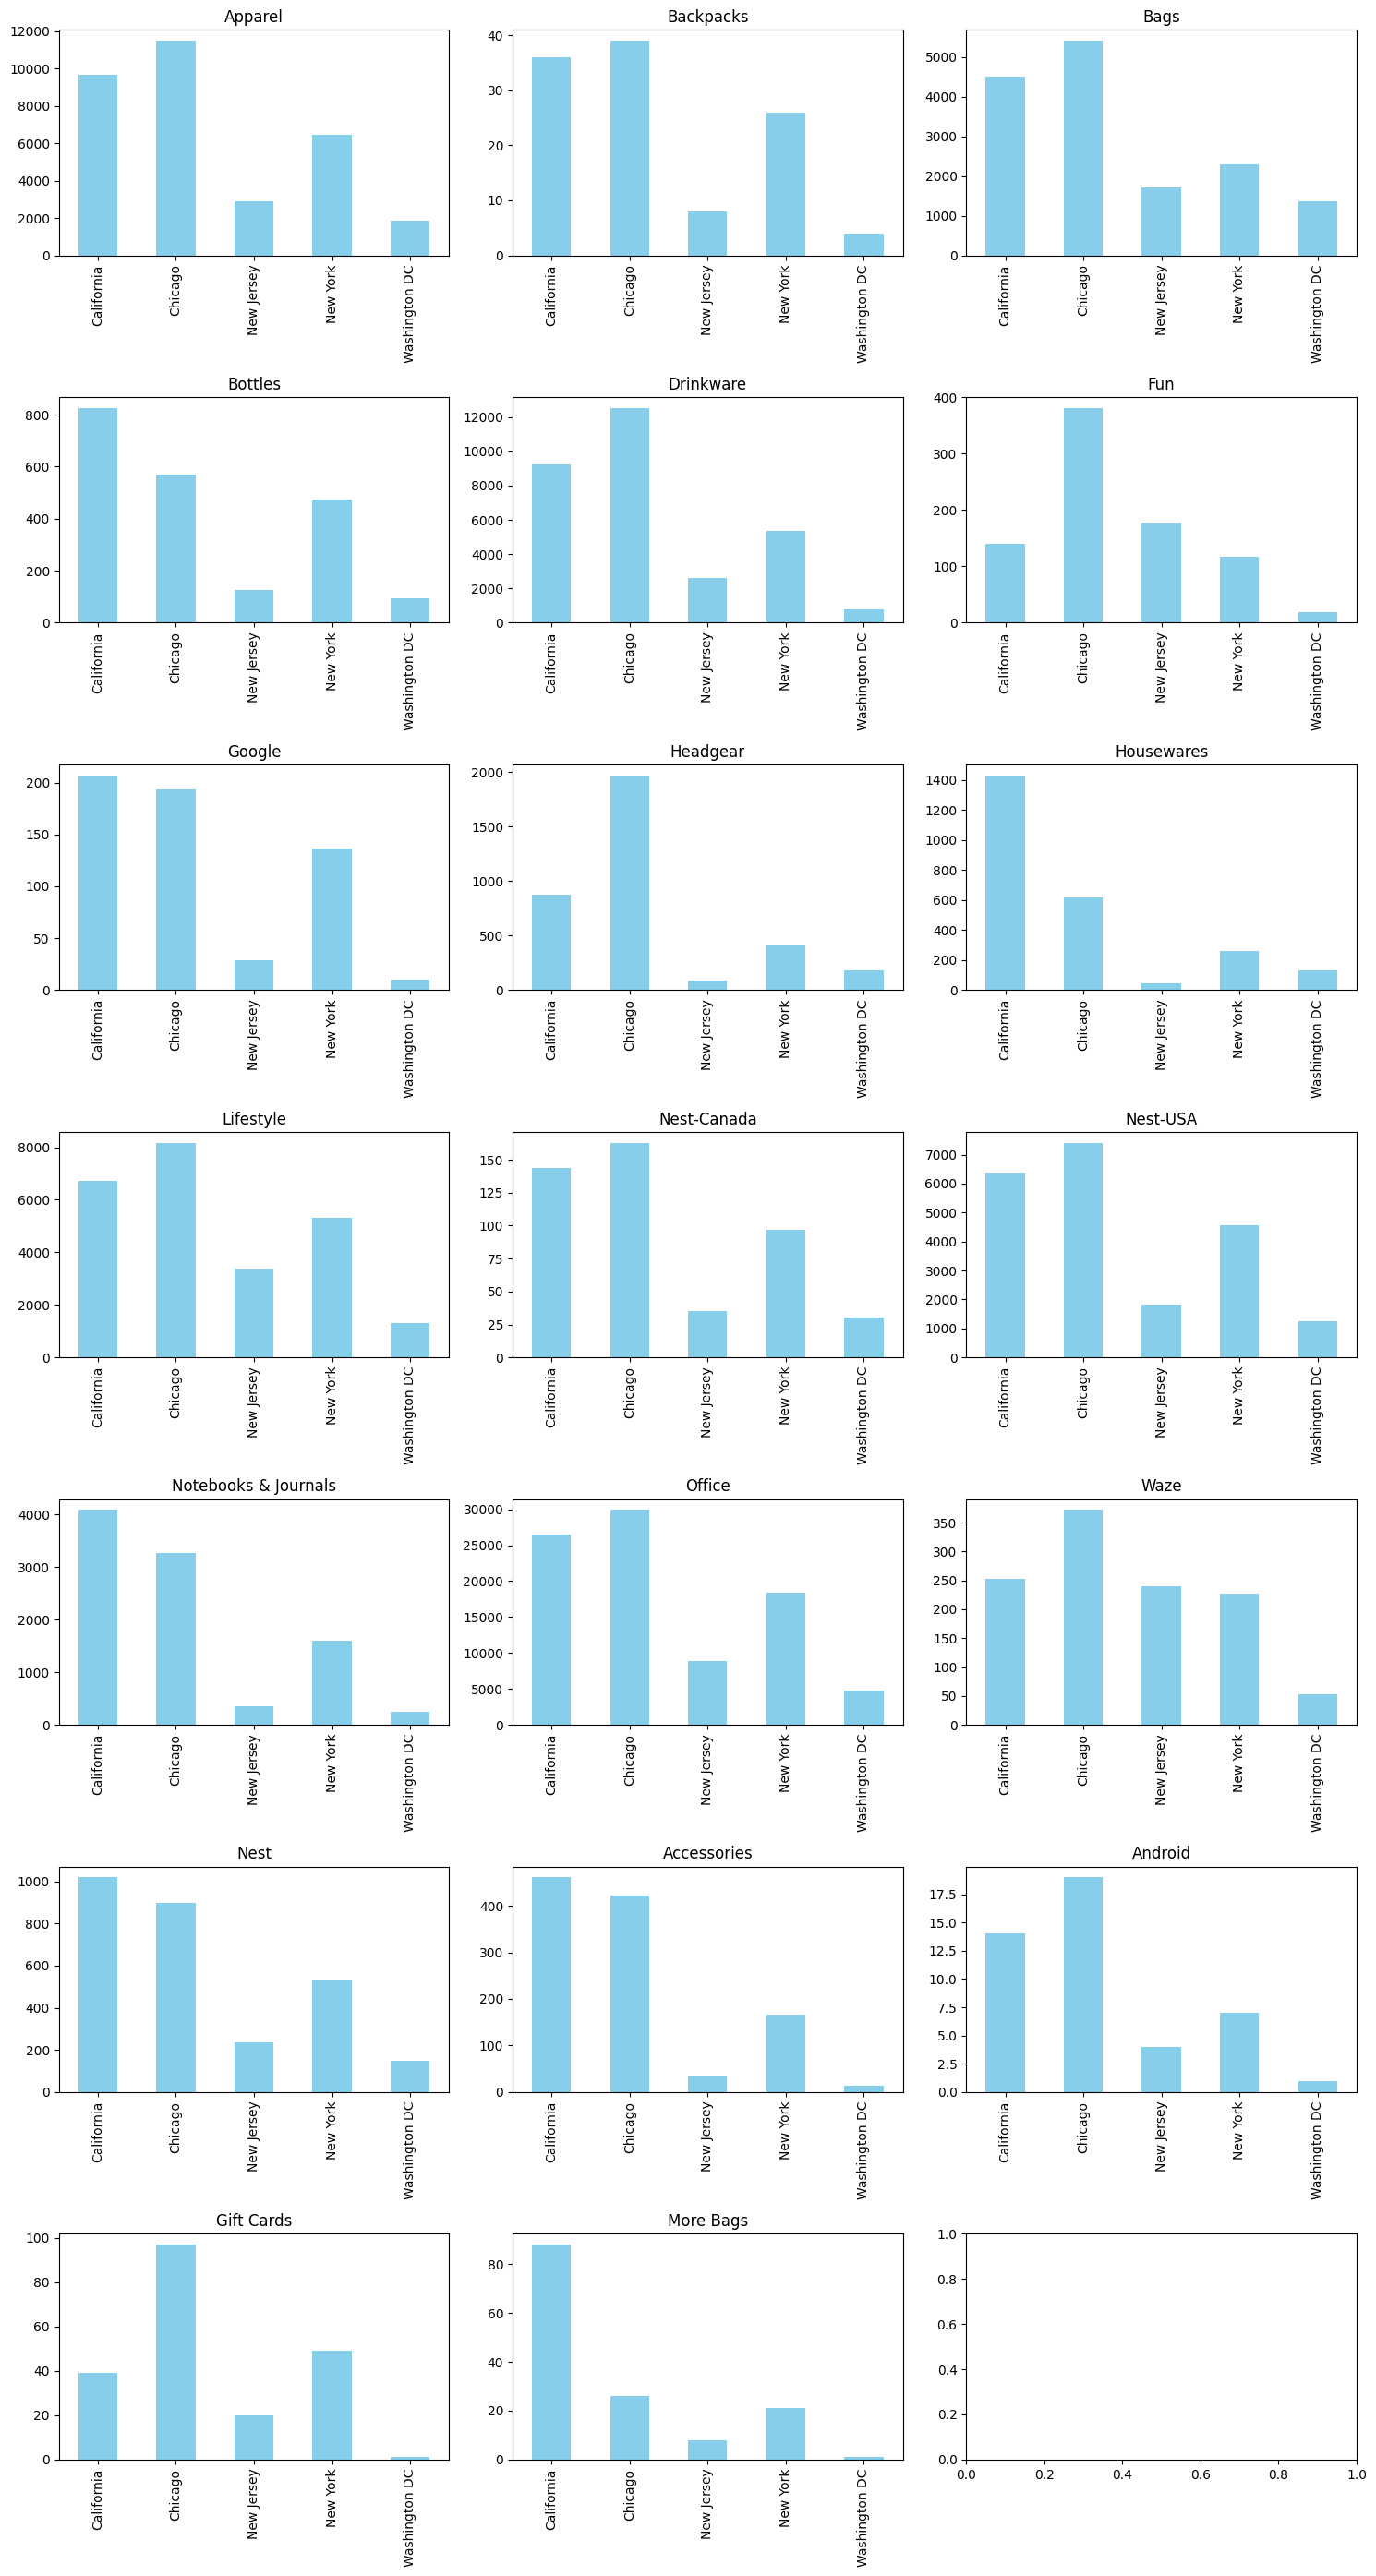

In [25]:
categories = merged['제품카테고리'].unique()

num_cols = 3
num_rows = int(np.ceil(len(categories) / num_cols))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows))

for i, category in enumerate(categories):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    data = merged[merged['제품카테고리'] == category].groupby('고객지역')['수량'].sum()
    data.plot(kind='bar', ax=ax, color='skyblue')

    ax.set_title(f'{category}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

## 결과
---
> Fun 카테고리를 제외하고, 나머지 모든 카테고리에서 California와 Chicago 지역이 매출량 1위와 2위를 다투고 있습니다.

즉, 지역을 중심으로 리텐션을 강화하기 위해서 California와 Chicago에 서비스를 강화하는 전략을 구사할수도 있고,

새로운 유입을 발생시키기 위해 New Jersey, New York, Washington DC에 서비스를 강화하는 전략을 구사할수도 있습니다.

New Jersey와 New York의 경우 카테고리에 따라 California, Chicago와 비슷한 매출량을 달성하는 경우가 있으니 조금의 마케팅과 투자가 이루어진다면

California, Chicago와 비슷한 수준의 매출량을 달성할 가능성이 있습니다.

그러나 Washington DC의 경우 거의 모든 카테고리에서 저조한 판매량을 기록하고 있으므로 Washington DC 지역의 투자에 대해서는 재고할 필요가 있습니다.

# [4. 세금, 그리고 매출]
---

각 카테고리에는 세금이 붙습니다. 그렇다면 세금이 높을수록 매출량은 줄어들까요?

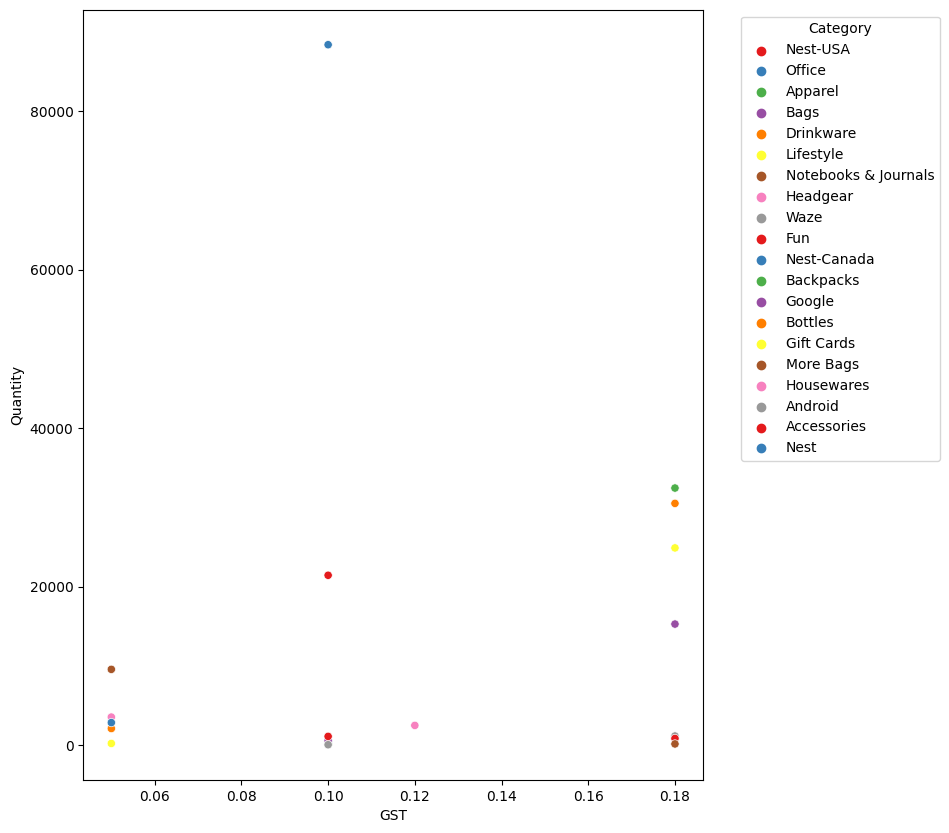

In [26]:
grouped = onlinesales.groupby('제품카테고리').agg({'수량':'sum'}).reset_index()
merged = pd.merge(tax, grouped, on='제품카테고리')

plt.figure(figsize=(8, 10))
sns.scatterplot(data=merged, x='GST', y='수량', hue='제품카테고리', palette='Set1')
plt.title('')
plt.xlabel('GST')
plt.ylabel('Quantity')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## 결과
---
세금과 매출량 사이에는 상관관계가 없는 것으로 보입니다.

정책의 변화로 인해 세금이 증가했을 때 매출량의 감소를 걱정할 필요는 없다는 것을 의미하기도 합니다.

# [5. 할인율과 매출의 주기성]
---
`discount.csv` 파일을 살펴보면, 총 17개의 카테고리가 3개월을 주기로 각각 10%, 20%, 30%의 할인 주기를 갖는 것을 발견할 수 있습니다.

In [27]:
# 예시로 Office 카테고리만 보도록 하겠습니다.
filtered_disc = discount[discount['제품카테고리'] == 'Office']
filtered_disc

,월,제품카테고리,쿠폰코드,할인율
6,Jan,Office,OFF10,10
7,Feb,Office,OFF20,20
8,Mar,Office,OFF30,30
57,Apr,Office,OFF10,10
58,May,Office,OFF20,20
59,Jun,Office,OFF30,30
108,Jul,Office,OFF10,10
109,Aug,Office,OFF20,20
110,Sep,Office,OFF30,30
159,Oct,Office,OFF10,10


> 사람들은 보통 할인율과 매출량은 양의 상관관계를 갖는다고 합니다.

이 데이터에서도 그러한 경향을 발견할 수 있을까요? 가설이 맞다면,

할인 주기를 갖는 카테고리는 매출 또한 주기성을 가져야합니다.

이를 알아봄으로서 각 월마다 다른 할인율을 제공하는 것이 매출 증대에 도움이 되는지 살펴보도록 하겠습니다.

In [28]:
# 데이터 형식을 onlinesales 데이터와 맞춰주도록 하겠습니다
discount_copy = discount.copy()
discount_copy['월'] = discount_copy['월'].replace({
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
})

coupon_used = onlinesales[onlinesales['쿠폰상태'] == 'Used'].copy()
coupon_used['월'] = coupon_used['거래날짜'].dt.month
coupon_used['총매출액'] = coupon_used['수량'] * coupon_used['평균금액']

grouped = coupon_used.groupby(['월', '제품카테고리']).agg({'수량':'sum', '총매출액':'sum'}).reset_index()
merged = pd.merge(grouped, discount_copy, on=['월', '제품카테고리'])

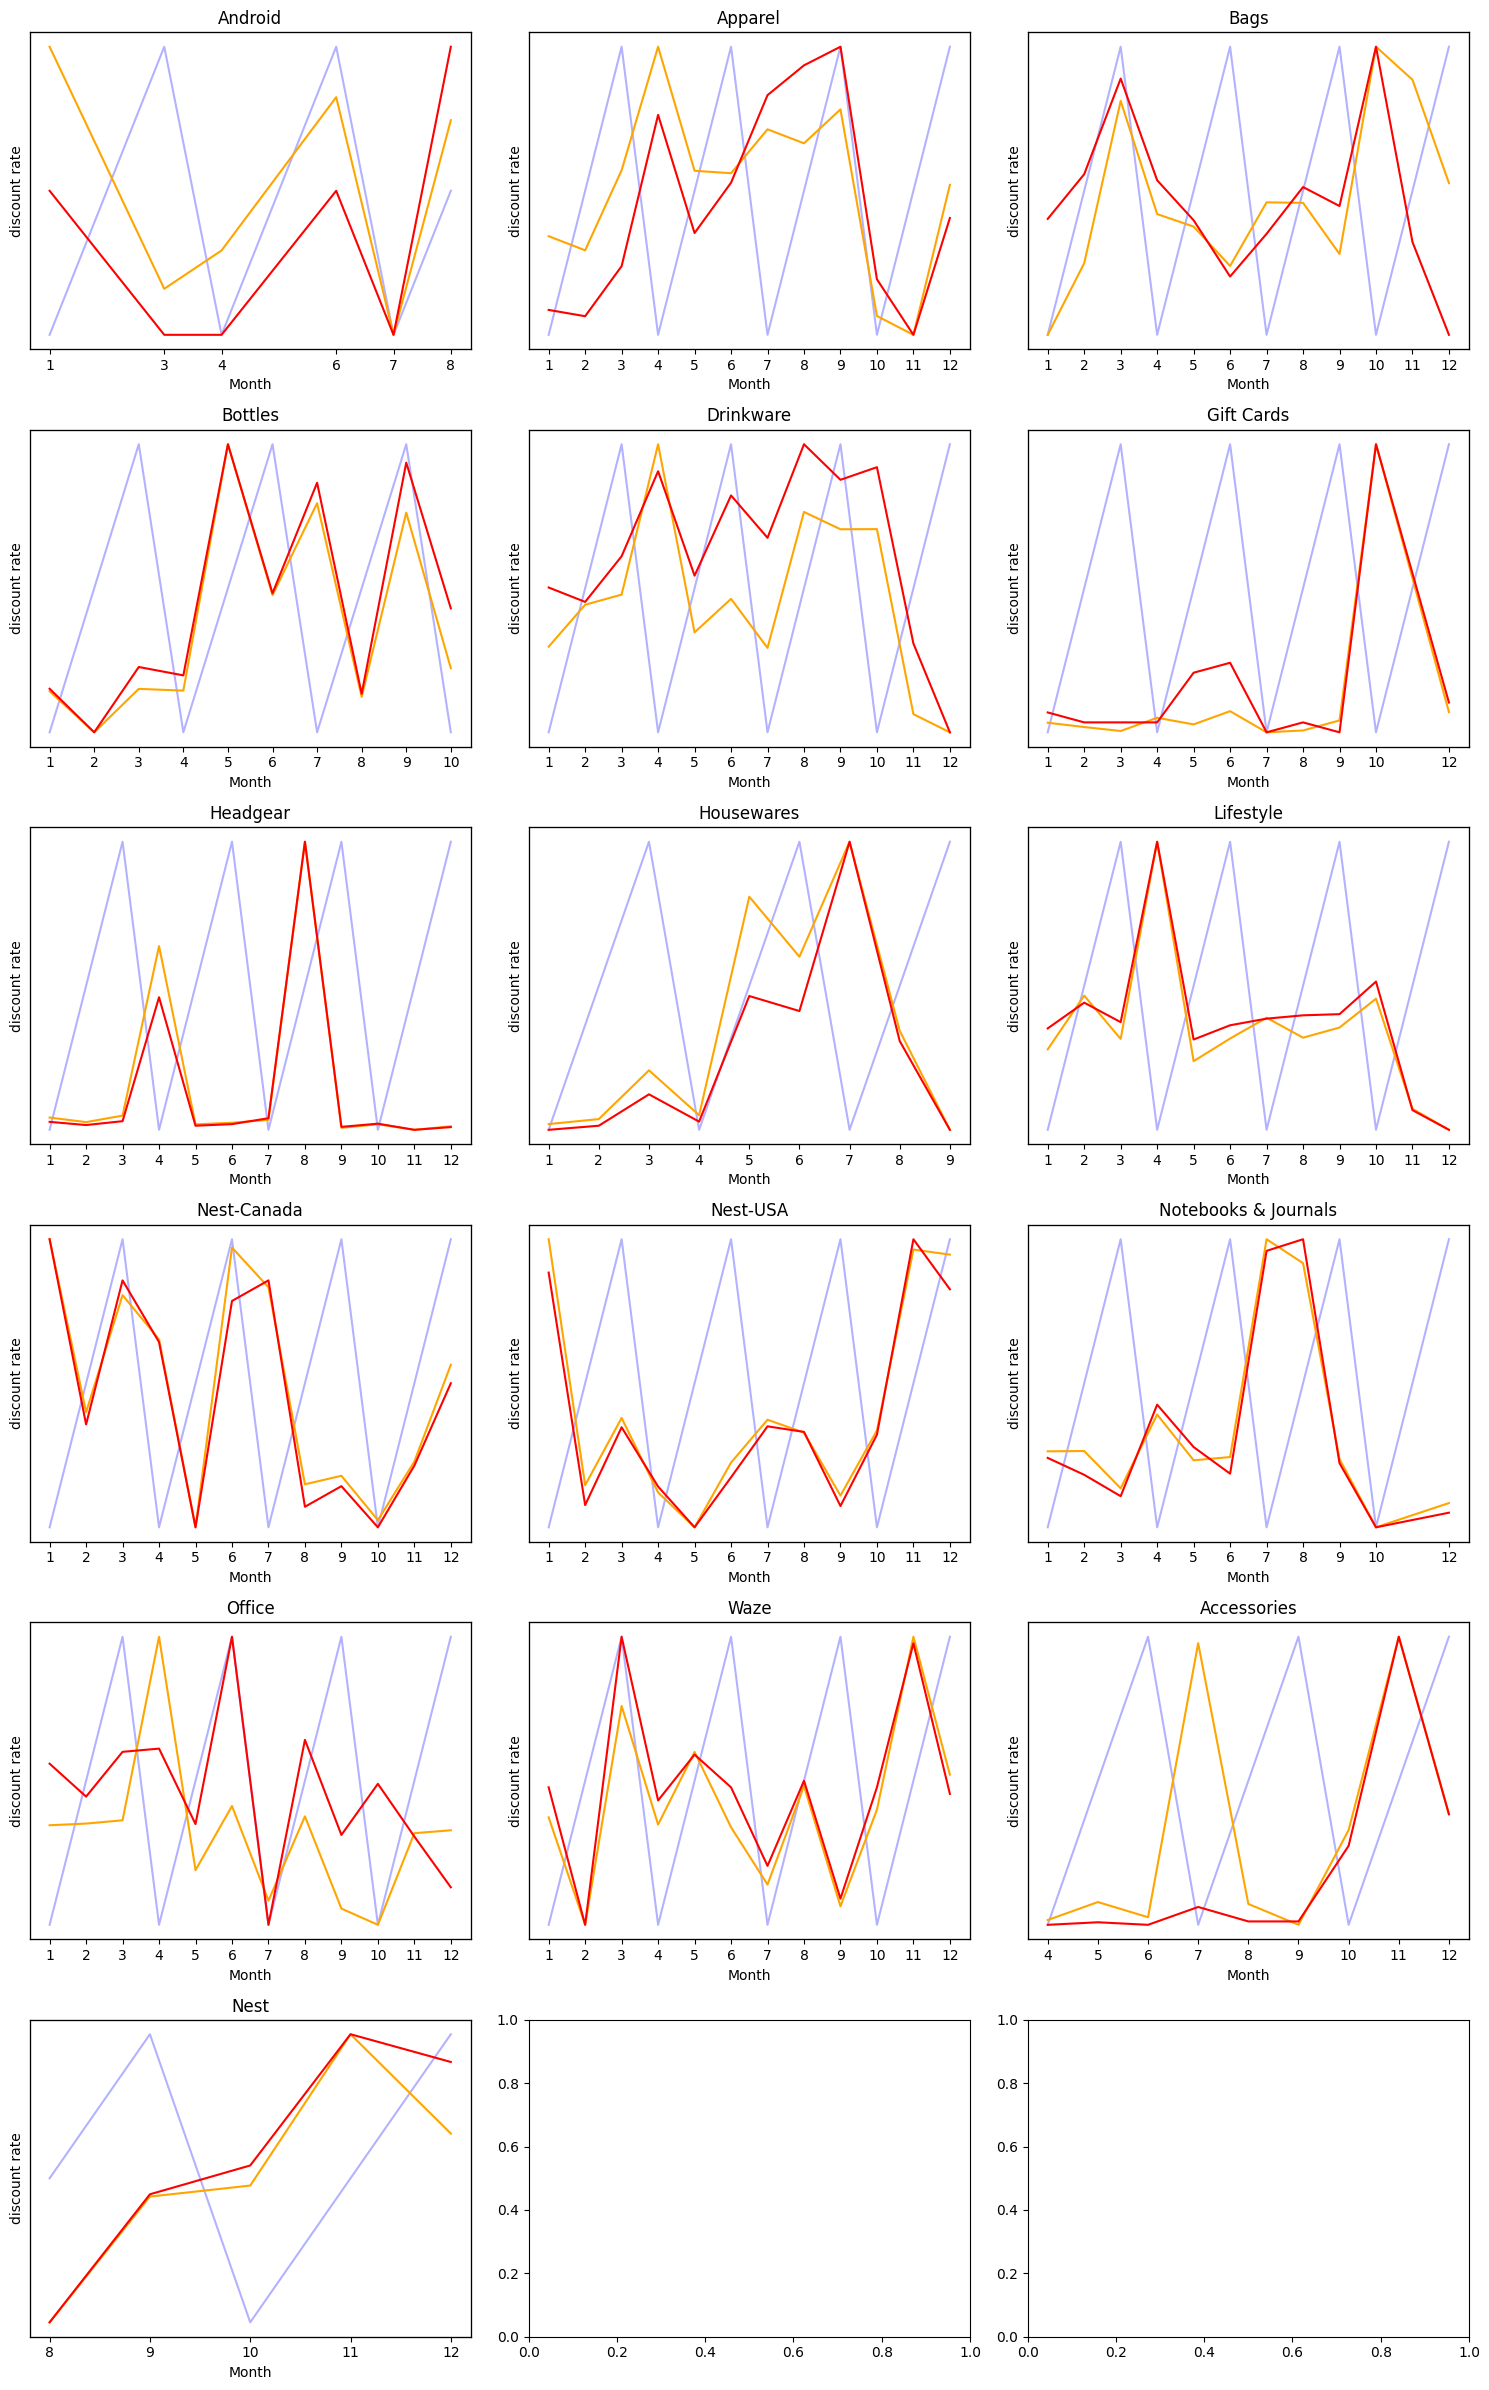

In [29]:
categories = merged['제품카테고리'].unique()

num_cols = 3
num_rows = int(np.ceil(len(categories) / num_cols))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows))

for i, category in enumerate(categories):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    data = merged[merged['제품카테고리'] == category]

    ax.set_title(f'{category}')

    sns.lineplot(data=data, x='월', y='할인율', label='discount rate', color='blue', ax=ax, alpha=0.3)
    ax.set_xlabel('Month')
    ax.set_ylabel('discount rate')
    ax.set_yticks([])

    ax2 = ax.twinx()
    sns.lineplot(data=data, x='월', y='총매출액', label='total sales', color='orange', ax=ax2)
    ax2.set_ylabel('')
    ax2.set_yticks([])

    ax3 = ax.twinx()
    sns.lineplot(data=data, x='월', y='수량', label='quantity', color='red', ax=ax3)
    ax3.set_ylabel('')
    ax3.set_yticks([])

    ax.legend().remove()
    ax2.legend().remove()
    ax3.legend().remove()

    ax2.set_xticks(data['월'].unique())

'''
연한 파란색: 할인율 (10%, 20%, 30%)
노란색: 총매출액 (달러)
빨간색: 매출량 (수량)
'''
plt.tight_layout()
plt.show()



> Android, Apparel, Bottles

세 개의 카테고리의 경우 하반기에 할인율과 매출량/매출액 그래프가 어느정도 비슷한 추세를 가지는 것을 확인할 수 있습니다.

이 세 개의 카테고리 또한 상반기에는 할인율과 매출량/매출액 동향과는 비슷한 추세를 가지고있지 않았으며,

다른 대부분의 카테고리 또한 할인율과 비슷한 추세를 가지고있다고 하기에는 무리가 있습니다.

## 결과
---

즉, 할인율이 올라간다고 해서 매출량/매출액이 증가하지는 않습니다.

사람들이 물건을 구매할 때 할인에 따라 구매하기 보다는 자신의 필요에 따라 구매한다는 것을 간접적으로 알 수 있습니다.

할인율이 올라가면 매출량은 많아진다 하더라도 높은 할인으로 인해 매출액 증가율이 떨어질 수 있습니다.

> 더불어, `discount.csv` 데이터를 보면 할인을 진행하지 않았다가 진행하는 데이터는 찾을 수 없었습니다.

할인율에 매출량/매출액이 연동되지 않는 것 같다면, 할인을 하지 않는 기간과 할인을 하는 기간으로 나누어서

할인을 하게 될 때의 매출량/매출액 추이가 연동되는지를 살펴볼 필요가 있어보입니다.

만약 이 매출량/매출액이 연동된다면, 할인율은 중요하지 않다는 소리가 되므로 할인율을 10%로 고정하거나 더 낮추고,

할인을 하는 기간과 하지않는 기간을 반복하여 최대한의 매출량/매출액을 달성하는 전략이 유효할 수 있습니다.

# [6. 할인율에 따른 리텐션 Cohort 분석]
---

할인율이 각각 10%, 20%, 30%가 있다는 것을 우리는 알고 있습니다.

그리고 5번 항목의 분석을 통해 할인율과 매출량/매출액이 제대로 연동되지 않는다는 것을 알았습니다.

그렇다면 할인은 정말 매출량/매출액에 도움이 되지 않는 것일까요?

Cohort 분석을 통해 알아보겠습니다.

> 각각 0%, 10%, 20%, 30%의 할인을 받고 첫 주문을 하게된 고객들의 리텐션은 어떻게 될까요?

**매 달 주문하는 것을 리텐션으로 정의했습니다.**

- 각 월에 쿠폰을 사용하고 구매한 고객의 리텐션
- 각 월에 쿠폰을 사용하지 않고 첫 구매한 (할인율; 0%) 고객의 리텐션

을 각각 알아보면서, 할인쿠폰의 효과를 조금 더 자세하게 알아보도록 하겠습니다.

In [30]:
# 쿠폰을 사용한 사람들의 리텐션부터 살펴보겠습니다
onlinesales_data = onlinesales[onlinesales['쿠폰상태'] == 'Used'].copy()

# 첫 구매일을 기준으로 그룹 생성
onlinesales_data['CohortGroup'] = onlinesales_data.groupby('고객ID')['거래날짜'].transform('min').dt.month

# 리텐션을 계산하기 위해 데이터 정리
only_cohort = onlinesales_data.groupby(['고객ID', '거래날짜']).agg({'CohortGroup':'first'}).reset_index()
only_cohort['거래날짜'] = only_cohort['거래날짜'].dt.month

# 리텐션 계산
retention_matrix = np.zeros((12, 12))

for cohort_month in range(1, 13):
  # 첫 구매 월의 고객
  cohort_df = only_cohort[only_cohort['CohortGroup'] == cohort_month]

  initial_customers = set(cohort_df['고객ID'].unique())
  prev_customers = initial_customers

  for month in range(cohort_month, 13):
    # 첫 구매 월의 고객 중 이번달에 구매한 고객
    curr_customers = set(cohort_df[cohort_df['거래날짜'] == month]['고객ID'].unique())

    # 저번달에 구매한 고객과의 교집합
    intersec = prev_customers.intersection(curr_customers)

    retention = len(intersec) / len(initial_customers) if prev_customers else 0
    retention_matrix[cohort_month - 1, month - 1] = retention * 100

    # 저번달에 구매한 고객 갱신
    prev_customers = intersec

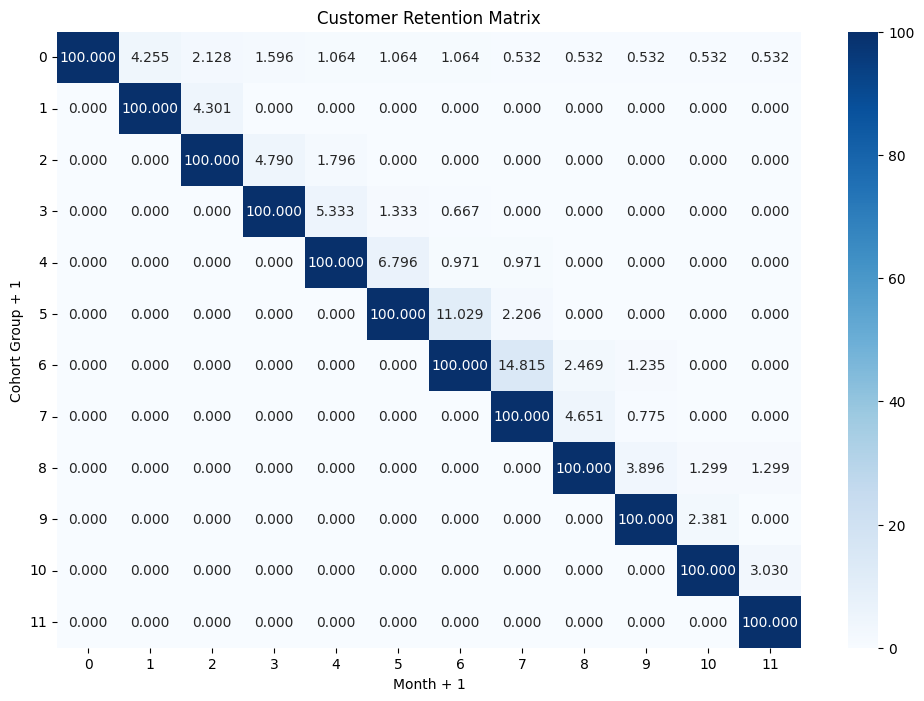

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix,
            annot=True,
            fmt='.3f',
            cmap='Blues',
            cbar=True)

plt.title('Customer Retention Matrix')
plt.xlabel('Month + 1')
plt.ylabel('Cohort Group + 1')
plt.yticks(rotation=0)
plt.show()


In [32]:
# 쿠폰을 사용하지 않은 사람들의 리텐션
onlinesales_data = onlinesales[onlinesales['쿠폰상태'] == 'Not Used'].copy()

# 첫 구매일을 기준으로 그룹 생성
onlinesales_data['CohortGroup'] = onlinesales_data.groupby('고객ID')['거래날짜'].transform('min').dt.month

# 리텐션을 계산하기 위해 데이터 정리
only_cohort = onlinesales_data.groupby(['고객ID', '거래날짜']).agg({'CohortGroup':'first'}).reset_index()
only_cohort['거래날짜'] = only_cohort['거래날짜'].dt.month

# 리텐션 계산
retention_matrix = np.zeros((12, 12))

for cohort_month in range(1, 13):
  # 첫 구매 월의 고객
  cohort_df = only_cohort[only_cohort['CohortGroup'] == cohort_month]

  initial_customers = set(cohort_df['고객ID'].unique())
  prev_customers = initial_customers

  for month in range(cohort_month, 13):
    # 첫 구매 월의 고객 중 이번달에 구매한 고객
    curr_customers = set(cohort_df[cohort_df['거래날짜'] == month]['고객ID'].unique())

    # 저번달에 구매한 고객과의 교집합
    intersec = prev_customers.intersection(curr_customers)

    retention = len(intersec) / len(initial_customers) if prev_customers else 0
    retention_matrix[cohort_month - 1, month - 1] = retention * 100

    # 저번달에 구매한 고객 갱신
    prev_customers = intersec

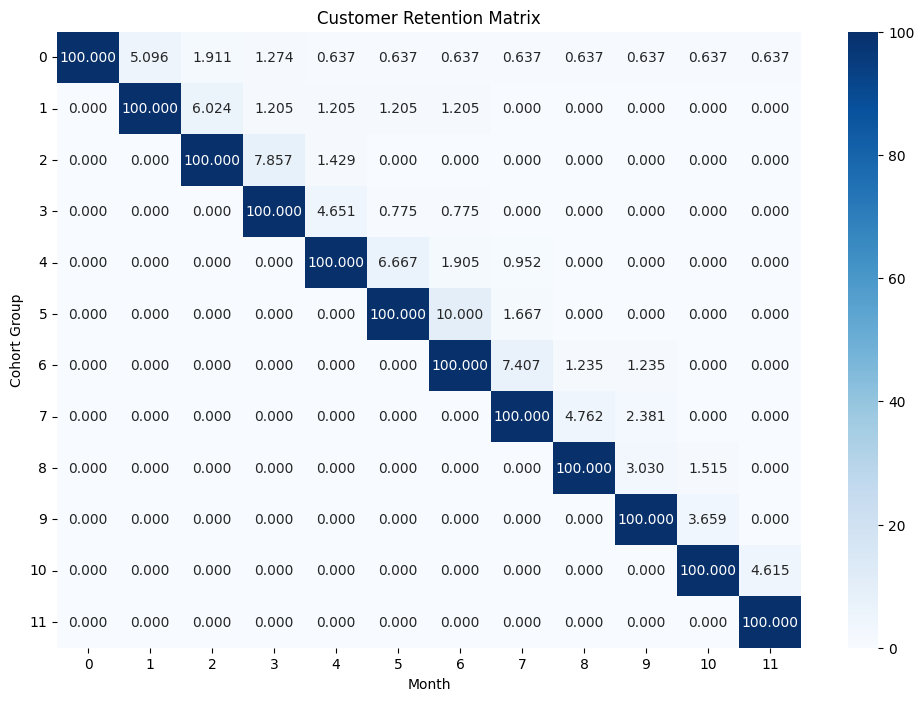

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix,
            annot=True,
            fmt='.3f',
            cmap='Blues',
            cbar=True)

plt.title('Customer Retention Matrix')
plt.xlabel('Month')
plt.ylabel('Cohort Group')
plt.yticks(rotation=0)
plt.show()

## 결과
---

첫 구매 이후 바로 다음달의 리텐션만 살펴보자면, 리텐션이 둘 다 엇비슷합니다.

할인쿠폰을 쓰고 첫 구매한 사람의 리텐션과, 할인쿠폰을 쓰지 않고 첫 구매한 사람의 리텐션 사이에 유의미한 차이가 없다는 것은

해당 쇼핑몰을 사용하는 사람들로 하여금 이 쇼핑몰이 가지고 있는 확실한 차밍 포인트(Charming Point)가 할인쿠폰에 있지는 않다는 것을 뜻합니다.

즉, 할인 쿠폰을 어떻게 뿌릴 것이냐 혹은 몇 퍼센트의 할인쿠폰을 제공해야 하느냐의 문제 이전에

**해당 쇼핑몰의 차밍 포인트는 할인쿠폰에 있지 않다는 것을 말합니다.**

> 할인쿠폰을 쓴 1월달 첫 구매 고객

> 할인쿠폰을 쓰지 않은 1, 2월달 첫 구매 고객

두 고객의 리텐션을 보면, 12월까지 꾸준히, 매달 물건을 고매하는 고객이 있습니다.

이러한 충성 고객의 구매 스타일이나 패턴을 분석해서

비슷한 고객층을 더 끌어들이거나, 쇼핑몰의 차밍 포인트를 찾아가는 활동이 필요해보입니다.

# [7. 월별 BEST, WORST 상품카테고리 알아보기]
---

쇼핑몰에서 가장 잘 팔리는 상품과 덜 팔리는 상품을 미리 알아놓으면,

고객 세분화 작업을 더욱 자세히 분석하는 동안

물품을 효율적으로 배치함으로써 쇼핑몰의 재무수준을 건전하게 유지할 수 있습니다.

월별로 가장 잘 팔린 카테고리와, 가장 덜 팔린 카테고리를 알아보도록 하겠습니다.

In [34]:
sales = onlinesales.copy()
sales['월'] = sales['거래날짜'].dt.month

grouped = sales.groupby(['월', '제품카테고리']).agg({'수량':'sum'}).reset_index()

best_worst = pd.DataFrame()
for month in range(1, 13):
  curr_month = grouped[grouped['월'] == month]

  best = curr_month[curr_month['수량'] == curr_month['수량'].max()]
  worst = curr_month[curr_month['수량'] == curr_month['수량'].min()]

  print(f'{month}월의 효자 상품과 불효자 상품')
  print('효자 상품: ', best['제품카테고리'].item())
  print('판매 수량: ', best['수량'].item())
  print('-' * 30)
  print('불효자 상품: ', worst['제품카테고리'].item())
  print('판매 수량: ', worst['수량'].item())
  print('-' * 80)

1월의 효자 상품과 불효자 상품
효자 상품:  Office
판매 수량:  10237
------------------------------
불효자 상품:  Accessories
판매 수량:  1
--------------------------------------------------------------------------------
2월의 효자 상품과 불효자 상품
효자 상품:  Office
판매 수량:  6389
------------------------------
불효자 상품:  Android
판매 수량:  1
--------------------------------------------------------------------------------
3월의 효자 상품과 불효자 상품
효자 상품:  Office
판매 수량:  8940
------------------------------
불효자 상품:  Accessories
판매 수량:  1
--------------------------------------------------------------------------------
4월의 효자 상품과 불효자 상품
효자 상품:  Office
판매 수량:  9106
------------------------------
불효자 상품:  Android
판매 수량:  2
--------------------------------------------------------------------------------
5월의 효자 상품과 불효자 상품
효자 상품:  Office
판매 수량:  7441
------------------------------
불효자 상품:  Android
판매 수량:  5
--------------------------------------------------------------------------------
6월의 효자 상품과 불효자 상품
효자 상품:  Office
판매 수량:  9294
--------------------

## 결과
---

효자 상품과 불효자 상품의 수량 차이가 극심하여 시각화로 나타내기 힘들 것 같아 텍스트로 나열했습니다.

가장 큰 매출액을 올린 제품카테고리와 적은 매출액을 올린 제품카테고리로 효자와 불효자를 구분할 수 있겠지만, 현재 이 분석의 목적은 물류 공간 효율화를 위함이므로 개수를 중심으로 분석하는게 적절합니다.

# [8. RFM 분석]
---

- RFM분석은
  - Recency : 최근
  - Frequency : 자주
  - Monetary : 많이

즉, 얼마나 최근에 구매했는지, 얼마나 자주 구매했는지, 얼마나 많이 구매했는지에 따라 고객을 분류하는 작업입니다. RFM 각각의 기준을 어떻게 정하느냐에 따라 분석이 달라집니다.

이번 분석에서는
- Recency: 최근 3개월 (10월, 11월, 12월)에 구매이력이 있는가
- Frequency: 주문수량이 가장 많은 유저 Top 100
- Monetary: 주문금액이 가장 높은 유저 Top 100

에 해당하면 각각 1점을 주어,

총 점수가 3점인 충성 고객을 골라보도록 하겠습니다.

In [35]:
customers = onlinesales.copy()
customers['총금액'] = customers['수량'] * customers['평균금액']
customers = customers.groupby(['고객ID', '거래날짜']).agg({'수량':'sum', '총금액':'sum'}).reset_index()
customers['Recency'] = customers.apply(lambda x: 1 if x['거래날짜'].month >= 10 else 0, axis=1)

grouped = customers.groupby('고객ID').agg({'거래날짜':'last', '수량':'sum', '총금액':'sum', 'Recency':'max'}).reset_index()

quantity_top100 = grouped.sort_values(by='수량', ascending=False).head(100)
amount_top100 = grouped.sort_values(by='총금액', ascending=False).head(100)

grouped['Frequency'] = grouped['고객ID'].apply(lambda x: 1 if x in quantity_top100['고객ID'].values else 0)
grouped['Monetary'] = grouped['고객ID'].apply(lambda x: 1 if x in amount_top100['고객ID'].values else 0)

grouped['Total'] = grouped['Recency'] + grouped['Frequency'] + grouped['Monetary']

loyal = grouped[grouped['Total'] == 3][['고객ID', '수량', '총금액']].reset_index(drop=True)
semi_loyal = grouped[grouped['Total'] == 2][['고객ID', '수량', '총금액']].reset_index(drop=True)

print('충성고객(3점) 수: ', loyal.shape[0])
print('예비 충성고객(2점) 수: ', semi_loyal.shape[0])
print('-' * 80)
print('충성고객 비율: ', (loyal.shape[0] / onlinesales.shape[0]) * 100)
print('예비 충성고객 비율: ', (semi_loyal.shape[0] / onlinesales.shape[0]) * 100)



충성고객(3점) 수:  37
예비 충성고객(2점) 수:  72
--------------------------------------------------------------------------------
충성고객 비율:  0.06991157130980274
예비 충성고객 비율:  0.13604413876502153


## 결론
---

RFM의 기준은 회사의 상황에 따라 얼마든지 달라질 수 있으며, 현재 설정한 기준은 임의의 기준입니다.

RFM분석으로 충성고객과 예비 충성고객을 선정했는데,
이커머스 쇼핑몰의 MAU 증대를 위해선 충성고객이 생각하는 이 회사의 장점을 파악하고, 이 장점을 최대한 드러내는 전략을 수립해야 합니다.

이를 위해 충성고객과 예비 충성고객의 활동로그를 집중 분석하거나,
이들에게 직접 인터뷰/User Test를 요청하면서 소중한 데이터를 수집할 수 있습니다.

# 종합

---

주어진 데이터를 모두 사용하기 위해 노력했습니다.

고객 세분화 뿐만아니라, 기업의 지속가능성과 성장 측면에서도 생각하여 데이터를 분석했습니다.

이때까지 분석하고 시각화한 데이터를 간단하게 정리하겠습니다.

---

1. 마케팅 비용과 매출액은 상관관계가 없다. 오히려 이를 분석하는 과정에서 이커머스의 성장이 이루어지지 않고 있다는 점을 발견했다.
  - 퍼포먼스 마케팅 알고리즘 개선이 필요하다

2. 가입 기간이 길다고 해서 많이 주문하지 않는다.

3. 본 이커머스는 여성이 대부분의 매출을 차지한다.

4. California 지역과 Chicago에서 매출이 많이 발생하고, New Jersey와 New York은 잠재 시장으로써 가치가 있다. Washington DC 지역의 경우 이커머스가 충분히 커지기 전까지 철수하는 것을 고려해보아야 한다.

5. 세금은 매출과 관련이 없으므로 신경쓰지 않아도 괜찮다.

6. 할인율과 매출액은 같은 주기로 움직이지 않는다.
  - Android, Apparel, Bottles 카테고리의 경우 하반기를 기점으로 어느정도 동일한 추세를 확인할 수 있었다.
    - 다음 연도에도 지속적으로 추적하며 같은 주기를 갖는지 검증할 필요가 있다.
  - 다른 카테고리의 경우 같은 주기를 갖지 않는다.
  - 할인쿠폰 제공 / 미제공을 반복하며 할인쿠폰 제공 주기가 매출액을 늘리고 줄인다는 가설을 검증해보는 실험기간이 필요하다.
    - 만약 이 실험의 가설이 참으로 검증된다면, 할인율이 아니라 할인쿠폰 제공 여부가 매출액에 중요한 영향을 끼치므로
    - 높은 할인율을 제공하지 않아도 되며, 제공과 미제공의 반복으로 매출액을 늘릴 수 있으므로 영업이익 개선에 효과가 있을 수 있다.

7. 할인쿠폰을 적용한 사람의 리텐션과 적용하지 않은 사람의 리텐션이 크게 다르지 않다.
  - 이커머스를 이용하는 결정적인 요소가 할인쿠폰에 있지 않다는 것을 뜻한다
  - 충성 고객을 분류하여 충성 고객의 데이터를 집중적으로 분석할 필요가 있다.

8. RFM분석을 통해 충성고객을 임의의 기준으로 분류하였으며, 이들의 데이터를 집중적으로 분석하거나 직접 인터뷰/User Test를 요청하여 사용자 데이터를 수집해야 할 필요성이 있다.

9. 각 월의 Best/Worst 상품을 분류하여, 이를 바탕으로 물류의 효율성을 재고할 수 있게 되었다.

---

# 아쉬운 점
---

고객을 세분화하기 위해 여러 방법을 시도해봤는데,

결국 세분화한 고객이 어떤 고객인지에 대해 조사하는 점이 미흡했습니다.

시간이 충분했다면 이 과정까지 수행했겠지만, 개인적으로 시간 분배를 효율적으로 하지 못한 것 같습니다.

고객 세분화의 목적이 매출 증대와 회사의 발전이기 때문에,

매출 증대와 회사의 발전이라는 목적을 달성하기 위해 고객 세분화 외의 방법도 사용했습니다.

그렇게 분석을 하다보니 정작 대회의 목표인 고객 세분화 분석이라는 목적을 제대로 달성하지 못했습니다.

다음 대회에 또 참여하게 된다면, 목적을 먼저 달성한 이후에 추가적으로 분석 작업을 진행하는 식으로 작업 방법을 수정해야겠습니다.

읽어주셔서 감사합니다.